# The Breast Cancer Wisconsin (Diagnostic) dataset


In [ ]:
#The dataset contains various attributes computed from digitized images of
#breast mass. Here are the attributes included in the dataset:

#mean_radius: Mean of distances from the center to points on the perimeter.
#mean_texture: Standard deviation of gray-scale values.
#mean_perimeter: Mean size of the core tumor.
#mean_area: Mean area of the core tumor.
#mean_smoothness: Mean of local variation in radius lengths.
#mean_compactness: Mean of perimeter^2 / area - 1.0.
#mean_concavity: Mean severity of concave portions of the contour.
#mean_concave_points: Mean number of concave portions of the contour.
#mean_symmetry: Mean symmetry of the tumor.
#mean_fractal_dimension: Mean "coastline approximation" - 1.
#se_radius: Standard error of distances from the center to points on the perimeter.
#se_texture: Standard error of gray-scale values.
#se_perimeter: Standard error of the tumor size.
#se_area: Standard error of the tumor area.
#se_smoothness: Standard error of local variation in radius lengths.
#se_compactness: Standard error of perimeter^2 / area - 1.0.
#se_concavity: Standard error of severity of concave portions of the contour.
#se_concave_points: Standard error for number of concave portions of the contour.
#se_symmetry: Standard error of tumor symmetry.
#se_fractal_dimension: Standard error for "coastline approximation" - 1.
#worst_radius: Worst or largest mean value for distances from the center to points on the perimeter.
#worst_texture: Worst or largest mean value for gray-scale values.
#worst_perimeter: Worst or largest mean value for tumor size.
#worst_area: Worst or largest mean value for tumor area.
#worst_smoothness: Worst or largest mean value for local variation in radius lengths.
#worst_compactness: Worst or largest mean value for perimeter^2 / area - 1.0.
#worst_concavity: Worst or largest mean value for severity of concave portions of the contour.
#worst_concave_points: Worst or largest mean value for number of concave portions of the contour.
#worst_symmetry: Worst or largest mean value for tumor symmetry.
#worst_fractal_dimension: Worst or largest mean value for "coastline approximation" - 1.

#These attributes are used to predict whether a breast tumor is malignant (1) or benign (0).

In [ ]:
# Install required packages
#!pip install scikit-learn pandas numpy matplotlib

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [ ]:
# Data preprocessing
X = data.data  # Features
y = data.target  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
y.shape

(569,)

In [ ]:
# Train and apply the Linear Regression model
linreg_model = LogisticRegression()
linreg_model.fit(X_train_scaled, y_train)
y_pred = linreg_model.predict(X_test_scaled)

Linear Regression Accuracy: 0.9736842105263158
Linear Regression Confusion Matrix:
 [[41  2]
 [ 1 70]]
Linear Regression Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



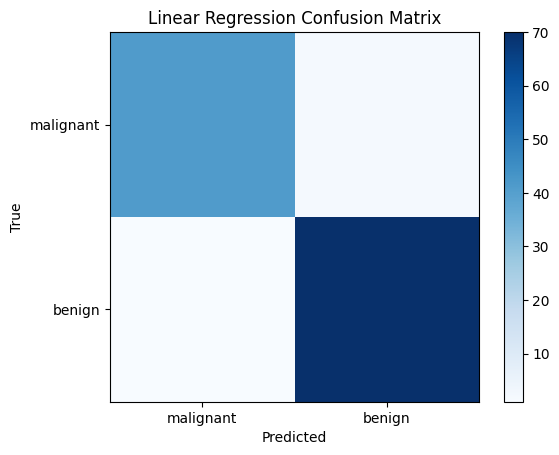

In [ ]:
# Evaluate the Linear Regression model
accuracy_linreg = accuracy_score(y_test, y_pred)
confusion_mat_linreg = confusion_matrix(y_test, y_pred)
classification_rep_linreg = classification_report(y_test, y_pred)

# Print the results
print("Linear Regression Accuracy:", accuracy_linreg)
print("Linear Regression Confusion Matrix:\n", confusion_mat_linreg)
print("Linear Regression Classification Report:\n", classification_rep_linreg)

# Plot the confusion matrix
plt.imshow(confusion_mat_linreg, cmap='Blues')
plt.title('Linear Regression Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(len(data.target_names)), data.target_names)
plt.yticks(np.arange(len(data.target_names)), data.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
# Train and apply the kNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)
y_pred = knn_model.predict(X_test_scaled)

In [ ]:
# compute the accuracy of the kNN model and assign it to variable accuracy_knn
accuracy_knn = accuracy_score(y_test, y_pred)
print(accuracy_knn)

0.9473684210526315


In [ ]:
# Train and apply the Neural Network model
nn_model = MLPClassifier()
nn_model.fit(X_train_scaled, y_train)
y_pred = nn_model.predict(X_test_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# compute the accuracy of the Neural Network model and assign it to variable accuracy_nn
accuracy_nn = accuracy_score(y_test, y_pred)
print(accuracy_nn)

0.9736842105263158


In [ ]:
# Train and apply the Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train)
y_pred = dt_model.predict(X_test_scaled)

In [ ]:
# compute the accuracy of the Decision Tree model and assign it to variable accuracy_dt
accuracy_dt = accuracy_score(y_test, y_pred)
print(accuracy_dt)

0.9385964912280702


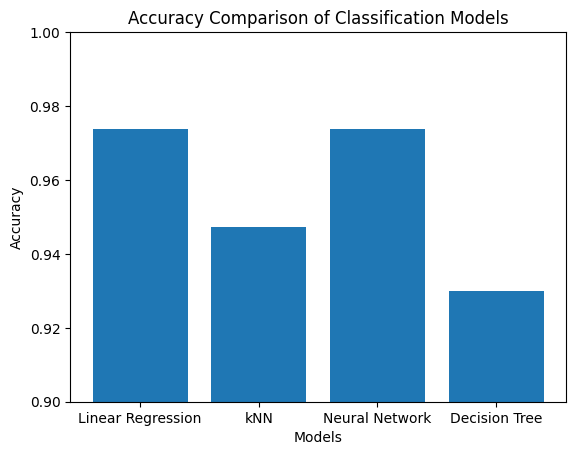

In [ ]:
# Create a bar plot to compare the accuracies
models = ['Linear Regression', 'kNN', 'Neural Network', 'Decision Tree']
accuracies = [accuracy_linreg, accuracy_knn, accuracy_nn, accuracy_dt]

plt.bar(models, accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Classification Models')
plt.ylim(0.9, 1.0)
plt.show()